In [2]:
#imports here!!

import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
import scipy.linalg as la

### Problem 01

In [3]:
def k_clustering(I,k,eps):   #shape of I : d*N == d*(M*M)
    N,d = I.shape
    
    prev_u = np.zeros((k,d))                    ### to check error
    curr_u = np.array(random.choices(I,k = k))  ### randomly picks pixels as mean
    error = 1000
    z=0
    while (error > eps):
        z= z+1
        R = [[] for _ in range(k)]
        ########################  STEP 01
        for i in range(N):
            cluster_idx = pix_dist(I[i],curr_u)
            R[cluster_idx].append(I[i])
        ######################## STEP 02
        prev_u = curr_u.copy()
        for l in range(k):
            curr_u[l] = centroid(np.array(R[l]))
            
        error = (np.linalg.norm(prev_u - curr_u))
        print('error at iteration %d : %.2f'%(z,error))
        
    return curr_u
            
        
        
        
        
def pix_dist(P,u):  ### Checks which centroid is best
    k,d  = u.shape
    mini = 1000
    for j in range(k):
        dist = np.linalg.norm(P - u[j])
        if(dist < mini):
            ans = j
            mini = dist
        
    return ans
    
    
def centroid(PIC): ##PIC == Points in cluster

    return np.array([ np.mean(PIC[:,0]), np.mean(PIC[:,1]), np.mean(PIC[:,2]) ])
    
    
def image_compress(img,u):
    h,w,d = img.shape
    img_c = img.copy()
    
    for i in range(h):
        for j in range(w):
            k_no = pix_dist(img[i][j], u)
            img_c[i][j] = u[k_no]
    return img_c
    
    
    





--------- K_means clustering for k = 2 ---------
error at iteration 1 : 56.59
error at iteration 2 : 6.49
The pixel centroids are  
  [[144.51264267  44.60922015  33.15079614]
 [154.86696627 183.01107126  98.2621836 ]]




--------- K_means clustering for k = 3 ---------
error at iteration 1 : 47.52
error at iteration 2 : 12.01
The pixel centroids are  
  [[155.29822972 183.82409693  98.73008719]
 [ 89.99734419  42.68146     24.66685304]
 [187.06852     48.34605085  40.73853629]]




--------- K_means clustering for k = 4 ---------
error at iteration 1 : 85.81
error at iteration 2 : 25.10
The pixel centroids are  
  [[ 63.34310288   6.51991436   5.96700011]
 [187.93392132 211.63026413 170.31169191]
 [146.75647734 174.4645513   82.9530351 ]
 [169.72964738  50.7419621   39.46568487]]


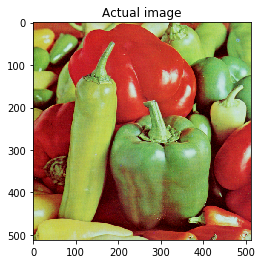

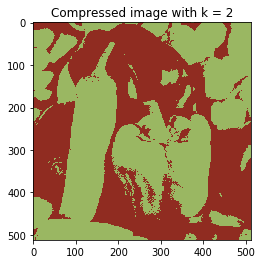

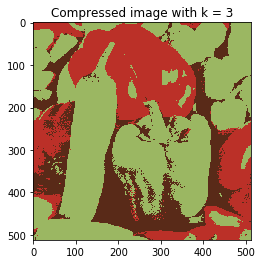

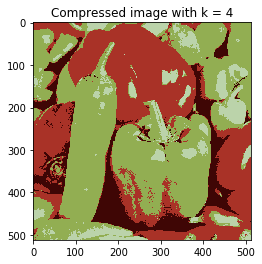

<Figure size 432x288 with 0 Axes>

In [4]:
############################################
##   IMPLEMENTATION  1
###########################################

## Showing the compressed image for different no. of clusters . Epsilon = 30 units

i = cv2.imread('k.tiff')
img = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Actual image")
plt.figure()

def implement(k):
    m,n,d = img.shape
    I = np.array(img.reshape((m*n),d),dtype = np.float)
    K_center = k_clustering(I,k,30)                      

    print('The pixel centroids are  \n ', K_center)
    img_c = image_compress(img,K_center)
    plt.imshow(img_c)
    plt.title("Compressed image with k = %d"%k)
    plt.figure()
    
    
for i in range(2,5):
    print('\n')
    print('\n')
    print("--------- K_means clustering for k = %d ---------"%i)
    implement(i)

# Problem 2

In [5]:
######## Setup#######
#### Using pixel data as information with 3 features(R,G,B)

i = cv2.imread('k.tiff')
img = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
m,n,d = img.shape
I = np.array(img.reshape((m*n),d),dtype = np.float)
x = np.transpose(I)
x.shape

(3, 262144)

In [6]:
## Code ..

def PCA(x):   ###### input shape is d*N
    d,N = x.shape
    x_c = np.zeros(x.shape)
    ################ Zero mean of featured data
    for i in range(d):
        mean = np.mean(x[i])
        x_c[i] = x[i] - mean
    
    Cxx = (1/N)*x@np.transpose(x)
    _, P = la.eig(Cxx)
    y = np.transpose(P)@x    
    return y

In [7]:
#### Implementation and cross checking Cyy

Y = PCA(x)
d,N = Y.shape
Cyy = np.around((1/N)*Y@np.transpose(Y),decimals = 3)
print('Cyy is as follows :\n')
print(Cyy)

Cyy is as follows :

[[45881.191     0.        0.   ]
 [    0.     3542.315    -0.   ]
 [    0.       -0.      439.503]]


# Problem 3

### 3.1 Binomial

MLE for Binomial Distribution , Ground truth 'n_trails'= 10 , 'p' = 0.30, 
Estimated Parameter for n : 10   is n_trails = 10  p = 0.25
Estimated Parameter for n : 100   is n_trails = 10  p = 0.33
Estimated Parameter for n : 1000   is n_trails = 10  p = 0.31
Estimated Parameter for n : 10000   is n_trails = 10  p = 0.30
Estimated Parameter for n : 100000   is n_trails = 10  p = 0.30

Note: The height of the hist represent the no. of 1s(Heads) in 10 trails(tosses)


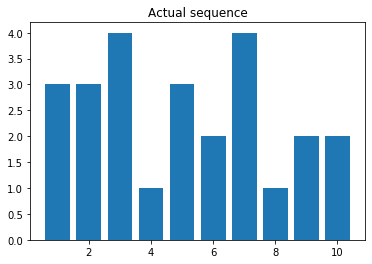

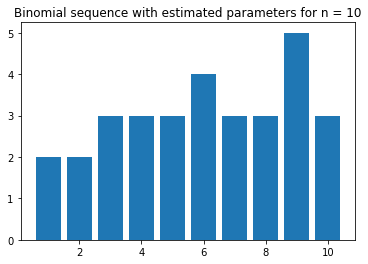

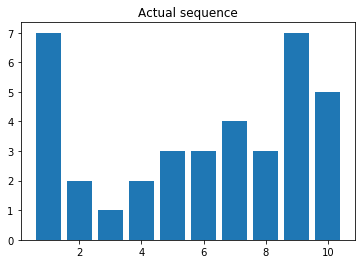

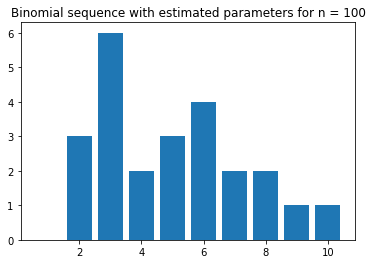

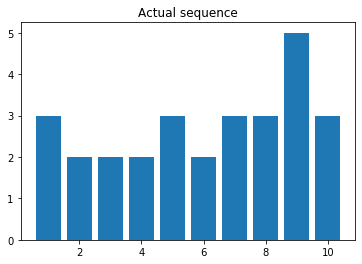

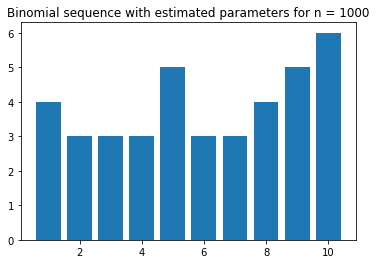

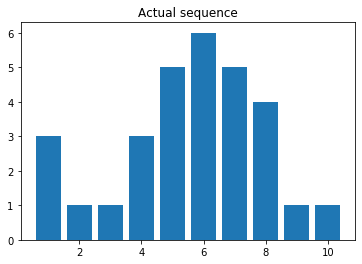

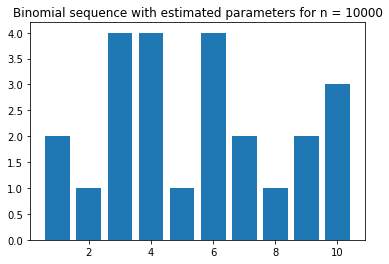

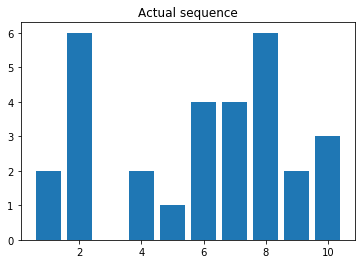

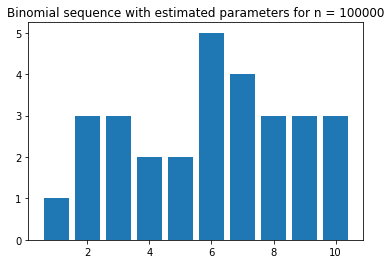

<Figure size 432x288 with 0 Axes>

In [8]:
### 3.1   Binomial

# mean = np

#Setting ground truth parameters
p = 0.3
n_trails = 10

print("MLE for Binomial Distribution , Ground truth 'n_trails'= %d , 'p' = %.2f, "%(n_trails,p))
print("==========================================")

###########################  Generating MLE for different n
for i in range(1,6):
    n = pow(10,i)
    
    x = np.random.binomial(n_trails,p,n)
    n_t_cap = 10
    mean = np.mean(x)
    p_cap = mean/n_trails
    
    print('Estimated Parameter for n : %d   is n_trails = %d  p = %.2f'%(n,n_t_cap,p_cap))
    
    x_cap = np.random.binomial(n_trails,p_cap,n)
    t = np.arange(1,11)
    plt.bar(t,x[0:10])
    plt.title('Actual sequence')
    plt.figure()
    
    plt.bar(t,x_cap[0:10])
    plt.title('Binomial sequence with estimated parameters for n = %d'%n)
    plt.figure()
    
    
    
print("\nNote: The height of the hist represent the no. of 1s(Heads) in 10 trails(tosses)")

### 3.2 Poisson

MLE for Poisson Distribution , Ground truth λ = 2.00
Estimated Parameter for n : 10 is λ = 1.80
Estimated Parameter for n : 100 is λ = 1.87
Estimated Parameter for n : 1000 is λ = 1.97
Estimated Parameter for n : 10000 is λ = 2.00
Estimated Parameter for n : 100000 is λ = 2.00


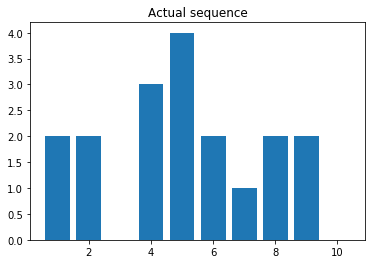

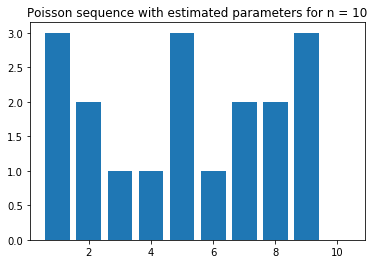

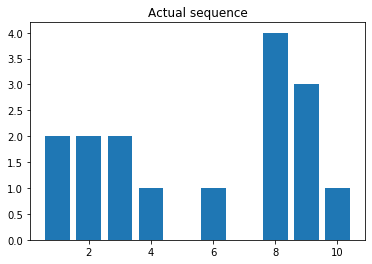

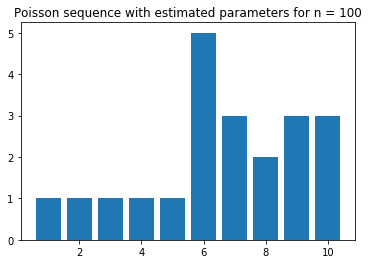

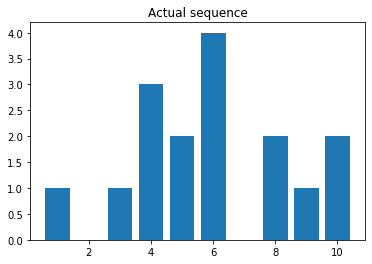

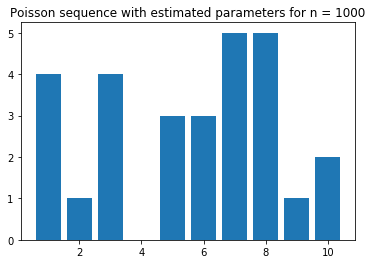

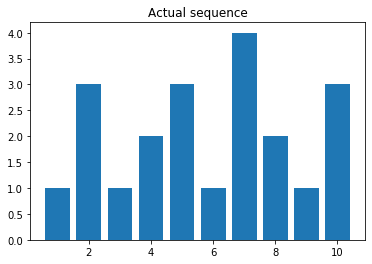

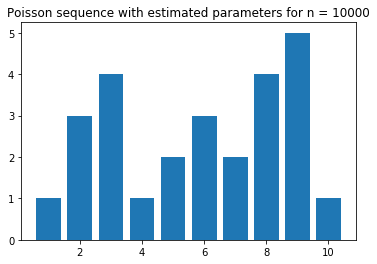

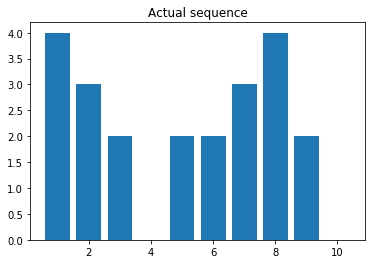

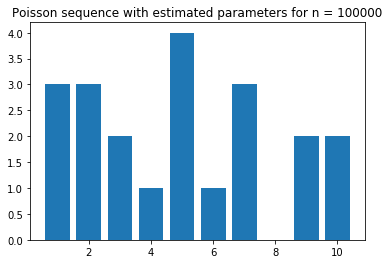

<Figure size 432x288 with 0 Axes>

In [9]:
### f(x) = λ^k * exp(-λ)/k!
## mean = λ

l = 2
print("MLE for Poisson Distribution , Ground truth λ = %.2f"%l)
print("==========================================")

###########################  Generating MLE for different n
for i in range(1,6):
    n = pow(10,i)
    
    x = np.random.poisson(l,n)
    mean = np.mean(x)
    
    l_cap = mean
    
    print('Estimated Parameter for n : %d is λ = %.2f'%(n,l_cap))
    
    x_cap = np.random.poisson(l_cap,n)
    t = np.arange(1,11)
    plt.bar(t,x[0:10])
    plt.title('Actual sequence')
    plt.figure()
    
    plt.bar(t,x_cap[0:10])
    plt.title('Poisson sequence with estimated parameters for n = %d'%n)
    plt.figure()

### 3.3 Exponential

MLE for Exponential Distribution , Ground truth λ = 2.00
Estimated Parameter for n : 10 is λ = 1.81
Estimated Parameter for n : 100 is λ = 1.85
Estimated Parameter for n : 1000 is λ = 2.04
Estimated Parameter for n : 10000 is λ = 2.01
Estimated Parameter for n : 100000 is λ = 2.00


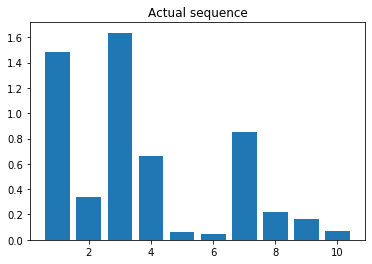

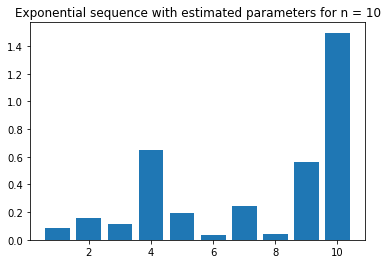

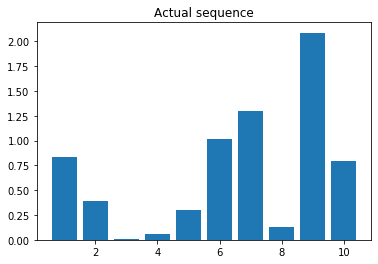

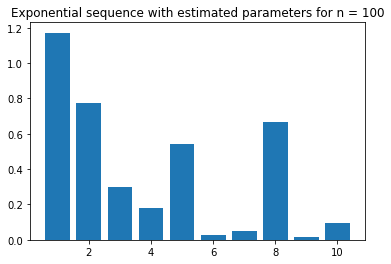

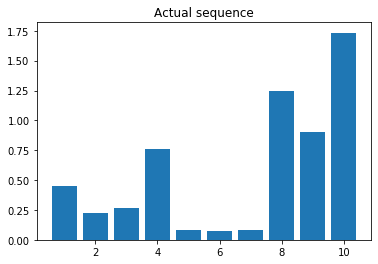

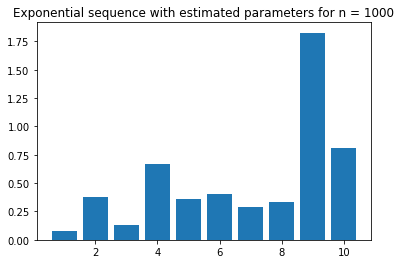

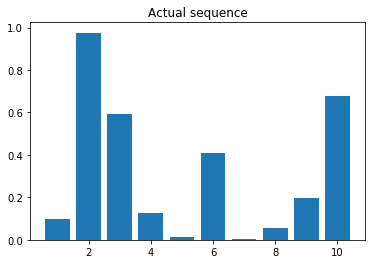

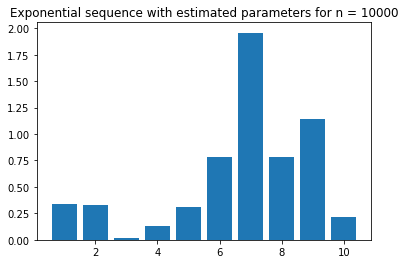

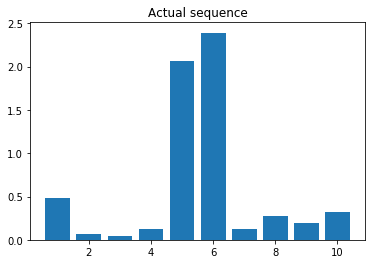

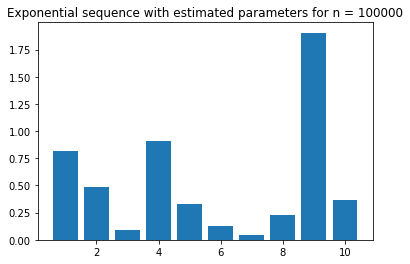

<Figure size 432x288 with 0 Axes>

In [10]:
### 3.3 
#### pdf : f(x) = λ.exp(-λx)
# mean = 1/λ

l = 2
print("MLE for Exponential Distribution , Ground truth λ = %.2f"%l)
print("==========================================")

###########################  Generating MLE for different n
for i in range(1,6):
    n = pow(10,i)
    
    x = np.random.exponential( (1/l),n)
    mean = np.mean(x)
    
    l_cap = 1/mean
    
    print('Estimated Parameter for n : %d is λ = %.2f'%(n,l_cap))
    
    x_cap = np.random.exponential((1/l_cap),n)
    t = np.arange(1,11)
    plt.bar(t,x[0:10])
    plt.title('Actual sequence')
    plt.figure()
    
    plt.bar(t,x_cap[0:10])
    plt.title('Exponential sequence with estimated parameters for n = %d'%n)
    plt.figure()


### 3.4 Gaussian

MLE for Gaussian Distribution , Ground truth: μ  = 5.00, σ = 1.00
Estimated Parameter for n : 10 is  μ  = 4.75, σ = 0.67
Estimated Parameter for n : 100 is  μ  = 5.11, σ = 0.92
Estimated Parameter for n : 1000 is  μ  = 4.98, σ = 1.00
Estimated Parameter for n : 10000 is  μ  = 4.99, σ = 1.01
Estimated Parameter for n : 100000 is  μ  = 5.00, σ = 1.00


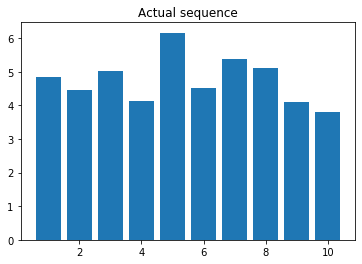

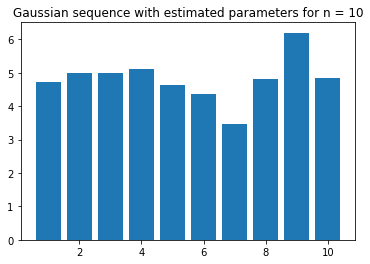

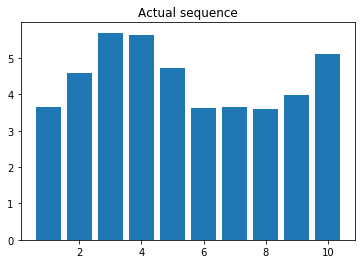

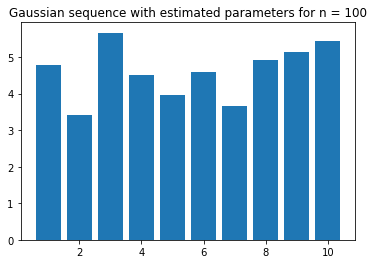

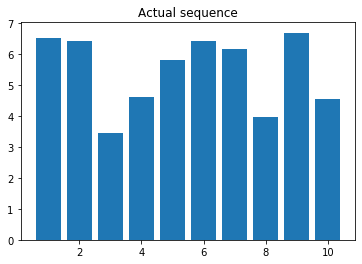

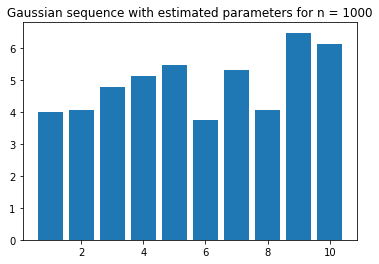

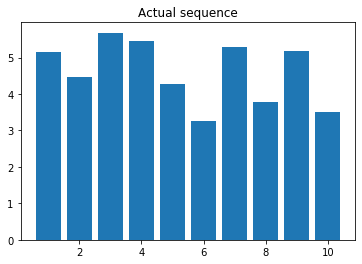

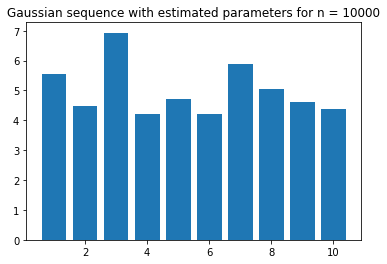

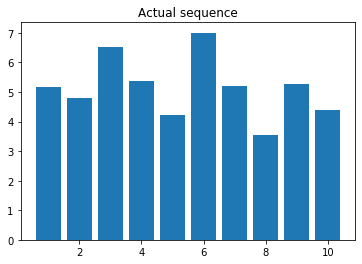

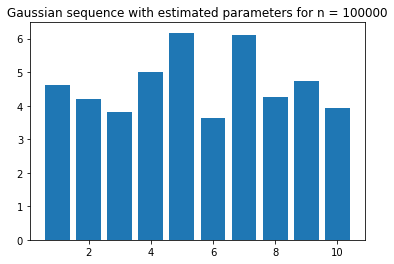

<Figure size 432x288 with 0 Axes>

In [11]:
### 3.4
####### pdf f(x): 1/sqrt(2*pi*σ^2) * exp(-(x-μ)^2/2σ^2)  

## mean = μ , var = σ^2

mu,std = 5,1
print("MLE for Gaussian Distribution , Ground truth: \N{greek small letter mu}  = %.2f, \N{greek small letter sigma} = %.2f"%(mu,std))
print("==========================================")

###########################  Generating MLE for different n
for i in range(1,6):
    n = pow(10,i)
    
    x = np.random.normal(mu,std,n)
    mean = np.mean(x)
    variance = np.var(x)
    
    mu_cap = mean
    std_cap = np.sqrt(variance)
    
    print('Estimated Parameter for n : %d is  \N{greek small letter mu}  = %.2f, \N{greek small letter sigma} = %.2f'%(n,mu_cap,std_cap))
    
    x_cap = np.random.normal(mu_cap,std_cap,n)
    t = np.arange(1,11)
    plt.bar(t,x[0:10])
    plt.title('Actual sequence')
    plt.figure()
    
    plt.bar(t,x_cap[0:10])
    plt.title('Gaussian sequence with estimated parameters for n = %d'%n)
    plt.figure()


### 3.5 Laplacian

MLE for Laplacian Distribution , Ground truth: μ  = 5.00, b = 1.00
Estimated Parameter for n : 10 is  μ  = 4.35, σ = 1.18
Estimated Parameter for n : 100 is  μ  = 4.76, σ = 1.01
Estimated Parameter for n : 1000 is  μ  = 4.96, σ = 1.03
Estimated Parameter for n : 10000 is  μ  = 5.02, σ = 1.00
Estimated Parameter for n : 100000 is  μ  = 5.00, σ = 1.00


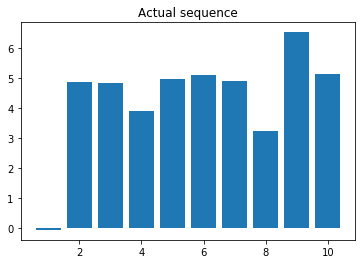

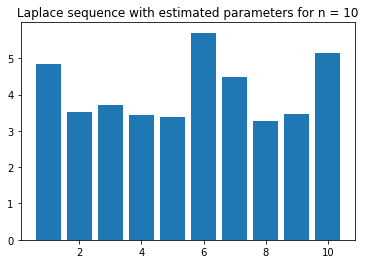

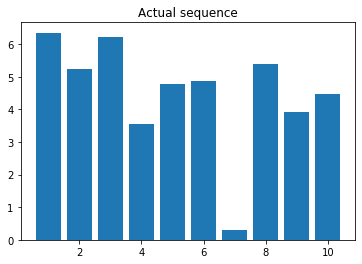

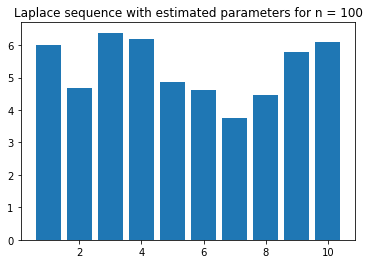

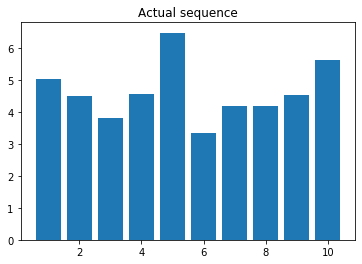

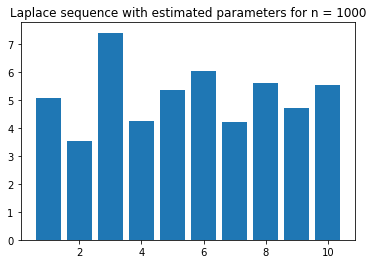

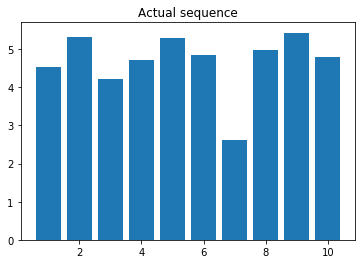

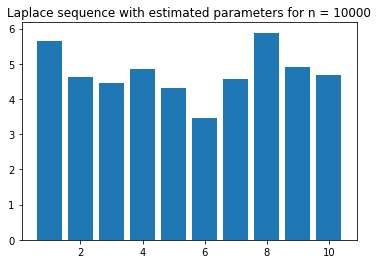

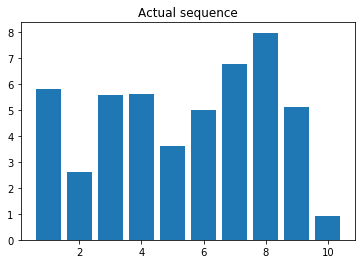

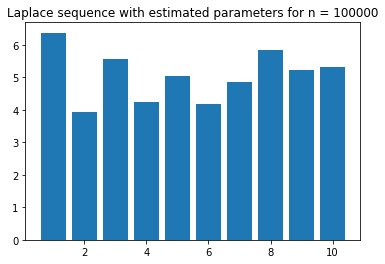

<Figure size 432x288 with 0 Axes>

In [12]:
### 3.5
######### pdf f(x) = (1/2b)* exp(-|x-μ|/b)

# mean = μ , var = 2b^2

mu,b = 5,1
print("MLE for Laplacian Distribution , Ground truth: \N{greek small letter mu}  = %.2f, b = %.2f"%(mu,b))
print("==========================================")

###########################  Generating MLE for different n
for i in range(1,6):
    n = pow(10,i)
    
    x = np.random.laplace(mu,b,n)
    mean = np.mean(x)
    variance = np.var(x)
    
    mu_cap = mean
    b_cap = np.sqrt(variance/2)
    
    print('Estimated Parameter for n : %d is  \N{greek small letter mu}  = %.2f, \N{greek small letter sigma} = %.2f'%(n,mu_cap,b_cap))
    
    x_cap = np.random.normal(mu_cap,std_cap,n)
    t = np.arange(1,11)
    plt.bar(t,x[0:10])
    plt.title('Actual sequence')
    plt.figure()
    
    plt.bar(t,x_cap[0:10])
    plt.title('Laplace sequence with estimated parameters for n = %d'%n)
    plt.figure()
